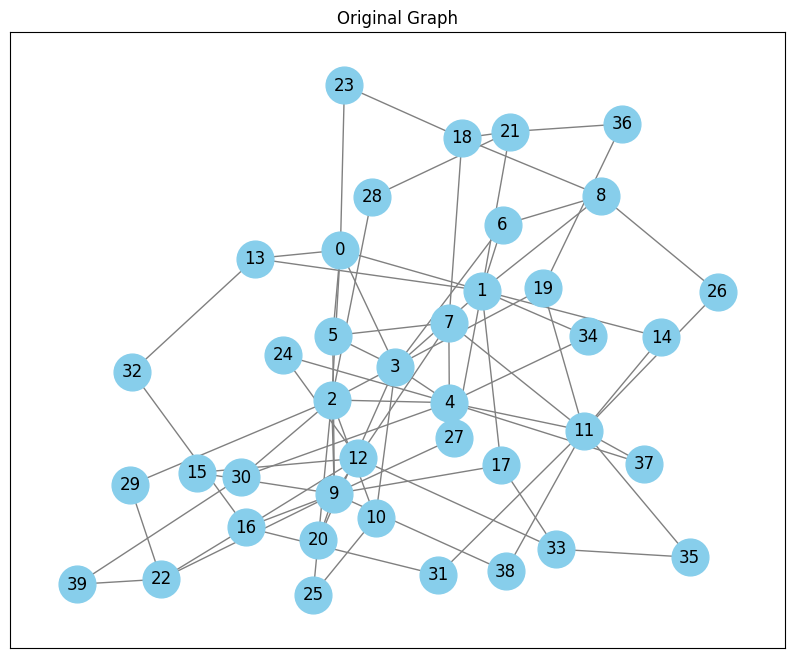

In [1]:
import networkx as nx
import random
from collections import deque
import matplotlib.pyplot as plt

# Load the Karate Club graph
G = nx.barabasi_albert_graph(40, 2) 

# Compute the spring layout for fixed node positions
pos = nx.spring_layout(G)

# Draw the graph with the fixed positions
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='skyblue', node_size=700, font_size=12, font_color='black', edge_color='gray')
plt.title('Original Graph')
plt.show()

In [2]:
def plot_degree_distribution(graph):
    """
    Plot the degree distribution of a NetworkX graph in log-log scale.
    
    Parameters:
    - graph: NetworkX graph object
    """
    degrees = [graph.degree(node) for node in graph.nodes()]
    degree_counts = nx.degree_histogram(graph)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(degree_counts)), degree_counts)
   # plt.loglog(range(len(degree_counts)), degree_counts, 'b', marker='.')
    plt.title("Degree Distribution (Log-Log Scale)")
    plt.loglog()
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    #plt.grid(True)
    plt.show()

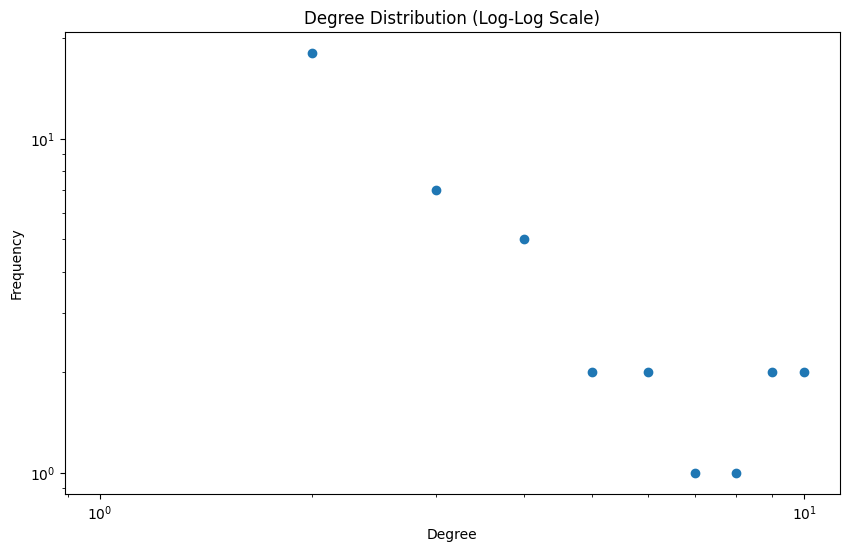

In [3]:
plot_degree_distribution(G)

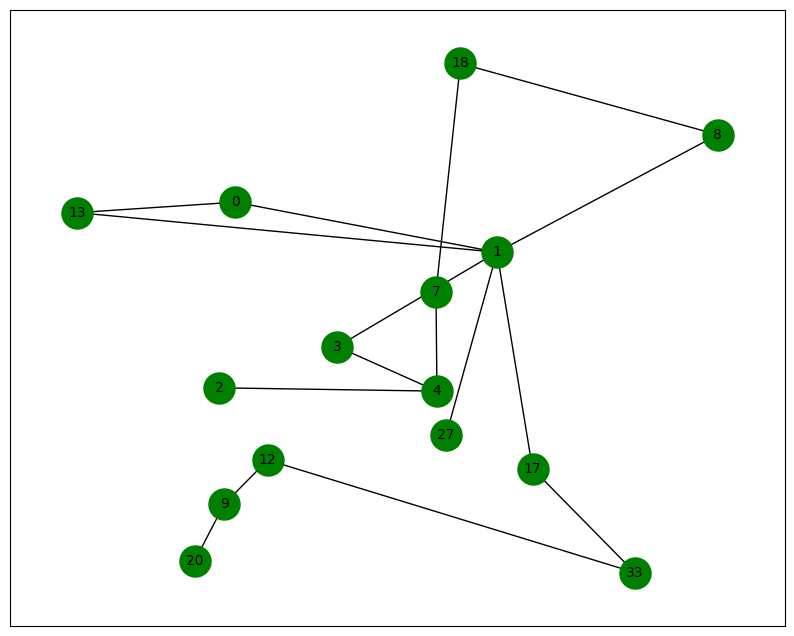

In [4]:
def metropolis_hastings_sampling(G, start_node, num_samples):
    """
    Perform Metropolis-Hastings Sampling on graph G starting from start_node and collect num_samples nodes.

    Parameters:
    G (networkx.Graph): The original graph.
    start_node (int): The node to start the sampling from.
    num_samples (int): The number of samples to collect.

    Returns:
    networkx.Graph: The sampled subgraph.
    """
    sampled_graph = nx.Graph()
    sampled_graph.add_node(start_node)
    
    current_node = start_node
    while sampled_graph.number_of_nodes() < num_samples:
        neighbors = list(G.neighbors(current_node))
        if not neighbors:
            break
        next_node = random.choice(neighbors)
        current_degree = G.degree(current_node)
        next_degree = G.degree(next_node)

        acceptance_ratio = min(1, next_degree / current_degree)
        if random.random() < acceptance_ratio:
            sampled_graph.add_node(next_node)
            sampled_graph.add_edge(current_node, next_node)
            current_node = next_node
        else:
            sampled_graph.add_node(current_node)
        
        if sampled_graph.number_of_nodes() >= num_samples:
            break
    
    return sampled_graph

start_node = 0
num_samples = 15
sampled_G_bfs = metropolis_hastings_sampling(G, start_node, num_samples)

plt.figure(figsize=(10, 8))
nx.draw_networkx(sampled_G_bfs, pos,  node_color='green', with_labels=True, node_size=500, font_size=10)
plt.show()

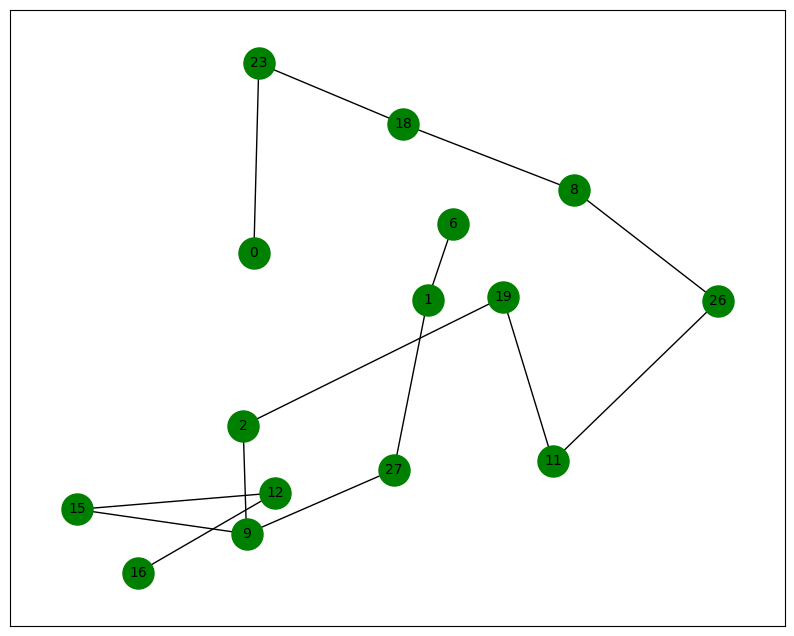

In [5]:
def random_walk_sampling(G, start_node, num_samples):
    """
    Perform Random Walk Sampling on graph G starting from start_node and collect num_samples nodes.

    Parameters:
    G (networkx.Graph): The original graph.
    start_node (int): The node to start the random walk from.
    num_samples (int): The number of samples to collect.

    Returns:
    networkx.Graph: The sampled subgraph.
    """
    sampled_graph = nx.Graph()
    sampled_graph.add_node(start_node)
    
    current_node = start_node
    visited = set()
    visited.add(current_node)
    
    while sampled_graph.number_of_nodes() < num_samples:
        neighbors = list(G.neighbors(current_node))
        if not neighbors:
            break
        next_node = random.choice(neighbors)
        
        if next_node not in visited:
            sampled_graph.add_node(next_node)
            sampled_graph.add_edge(current_node, next_node)
            visited.add(next_node)
        
        current_node = next_node
    
    return sampled_graph

start_node = 0
num_samples = 15
sampled_G_bfs = random_walk_sampling(G, start_node, num_samples)

# Plot the original graph and the sampled graph
plt.figure(figsize=(10, 8))
nx.draw_networkx(sampled_G_bfs, pos,  node_color='green', with_labels=True, node_size=500, font_size=10)

plt.show()

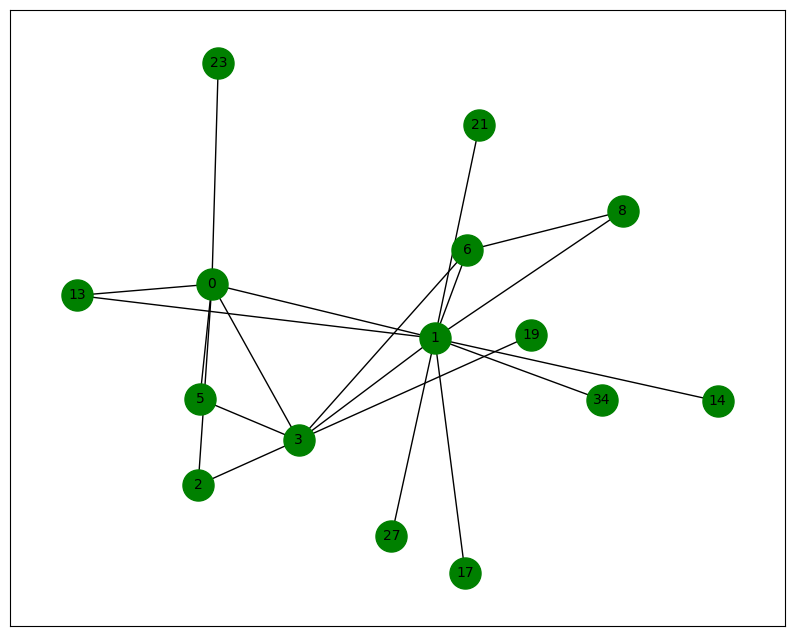

In [6]:
def snowball_sampling(graph, initial_nodes, sample_size, expand_depth=1):
    """
    Perform snowball sampling on a graph starting from initial nodes.
    
    Parameters:
    - graph: NetworkX graph object
    - initial_nodes: List of nodes to start sampling from
    - sample_size: Desired size of the sample
    - expand_depth: Number of times to expand the sampling to neighbors (default: 1)
    
    Returns:
    - sampled_nodes: List of nodes sampled
    """
    sampled_nodes = set(initial_nodes)  # Initialize sampled nodes with the initial set
    
    # Set of nodes to consider for expansion
    to_expand = set(initial_nodes)
    
    for _ in range(expand_depth):
        next_expand = set()
        
        for node in to_expand:
            neighbors = list(graph.neighbors(node))
            random.shuffle(neighbors)  # Shuffle to randomize the order of exploration
            for neighbor in neighbors:
                if len(sampled_nodes) < sample_size:
                    if neighbor not in sampled_nodes:
                        sampled_nodes.add(neighbor)
                        next_expand.add(neighbor)
                else:
                    break  # Stop expanding if sample size is reached
        
        to_expand = next_expand
        
        if len(sampled_nodes) >= sample_size:
            break  # Stop if sample size is reached
    
    return list(sampled_nodes)

initial_nodes = [0]
sample_size = 15
sampled_G_bfs = snowball_sampling(G, initial_nodes, sample_size, expand_depth=2)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)

plt.figure(figsize=(10, 8))
nx.draw_networkx(sampled_G_bfs, pos,  node_color='green', with_labels=True, node_size=500, font_size=10)

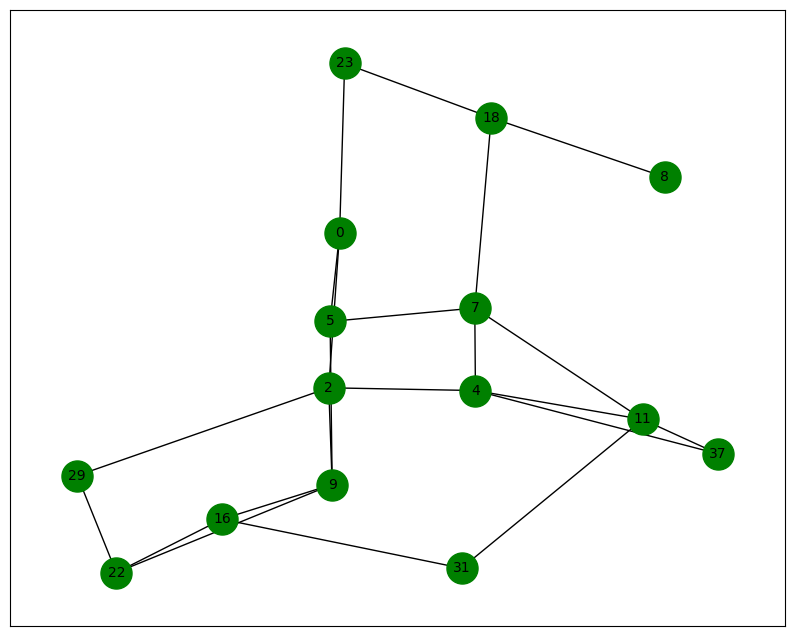

In [7]:
def depth_first_sampling(graph, initial_node, sample_size):
    """
    Perform depth-first sampling on a graph starting from an initial node.
    
    Parameters:
    - graph: NetworkX graph object
    - initial_node: Starting node for sampling
    - sample_size: Desired size of the sample
    
    Returns:
    - sampled_nodes: List of nodes sampled
    """
    sampled_nodes = set()  # To store sampled nodes
    stack = [initial_node]  # Stack for DFS
    
    while stack and len(sampled_nodes) < sample_size:
        node = stack.pop()
        
        if node not in sampled_nodes:
            sampled_nodes.add(node)
            neighbors = list(graph.neighbors(node))
            random.shuffle(neighbors)  # Shuffle to randomize the order of exploration
            for neighbor in neighbors:
                if len(sampled_nodes) < sample_size:
                    stack.append(neighbor)
    
    return list(sampled_nodes)

initial_node = 0
sample_size = 15
sampled_G_bfs = depth_first_sampling(G, initial_node, sample_size)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)

plt.figure(figsize=(10, 8))
nx.draw_networkx(sampled_G_bfs, pos,  node_color='green', with_labels=True, node_size=500, font_size=10)

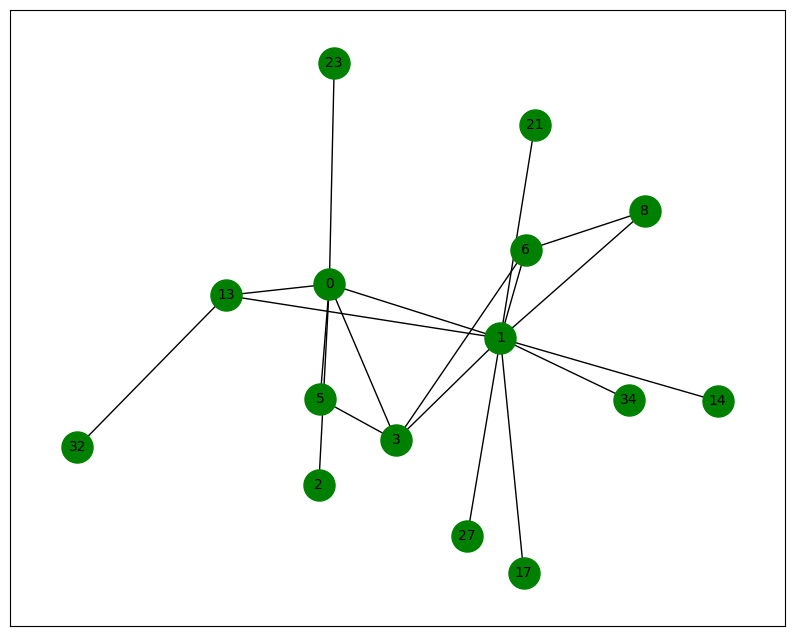

In [8]:
def breadth_first_sampling(graph, initial_nodes, sample_size):
    """
    Perform breadth-first sampling on a graph starting from initial nodes.
    
    Parameters:
    - graph: NetworkX graph object
    - initial_nodes: List of nodes to start sampling from
    - sample_size: Desired size of the sample
    
    Returns:
    - sampled_nodes: List of nodes sampled
    """
    sampled_nodes = set(initial_nodes)  # To store sampled nodes
    queue = deque(initial_nodes)  # Queue for BFS
    
    while queue and len(sampled_nodes) < sample_size:
        node = queue.popleft()
        
        neighbors = list(graph.neighbors(node))
        random.shuffle(neighbors)  # Shuffle to randomize the order of exploration
        
        for neighbor in neighbors:
            if neighbor not in sampled_nodes:
                sampled_nodes.add(neighbor)
                queue.append(neighbor)
                
                if len(sampled_nodes) >= sample_size:
                    break  # Stop if sample size is reached
        
    return list(sampled_nodes)

initial_nodes = [0]
sample_size = 15
sampled_G_bfs = breadth_first_sampling(G, initial_nodes, sample_size)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)

plt.figure(figsize=(10, 8))
nx.draw_networkx(sampled_G_bfs, pos,  node_color='green', with_labels=True, node_size=500, font_size=10)

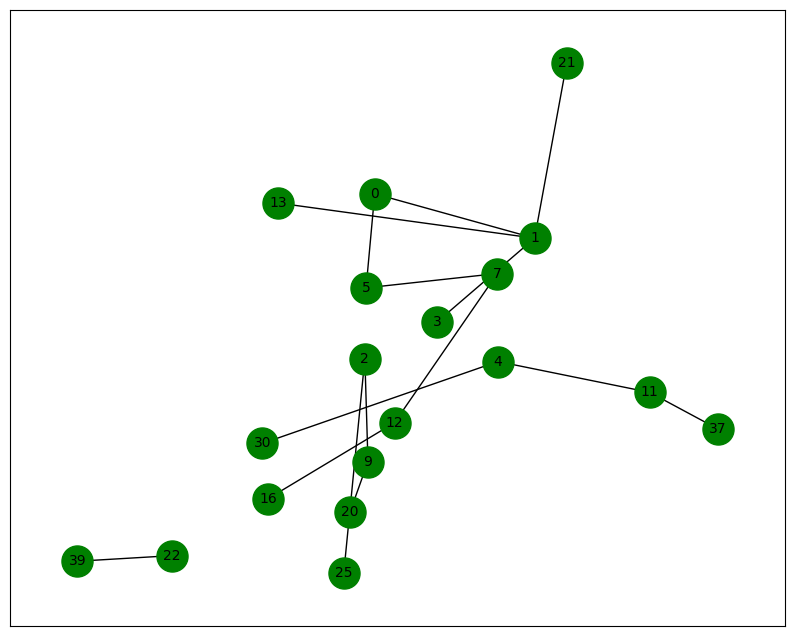

In [9]:
def random_edge_sampling(graph, sample_size):
    """
    Perform random edge sampling on a graph.
    
    Parameters:
    - graph: NetworkX graph object
    - sample_size: Desired number of edges to sample
    
    Returns:
    - sampled_edges: List of tuples representing sampled edges
    """
    edges = list(graph.edges())
    random.shuffle(edges)  # Shuffle edges to randomize sampling
    
    sampled_edges = edges[:sample_size]
    
    return sampled_edges

sample_size = 15
eds = random_edge_sampling(G, sample_size)


sampled_G_bfs = nx.Graph()
for e in eds:
    sampled_G_bfs.add_edge(e[0], e[1])


plt.figure(figsize=(10, 8))
nx.draw_networkx(sampled_G_bfs, pos,  node_color='green', with_labels=True, node_size=500, font_size=10)

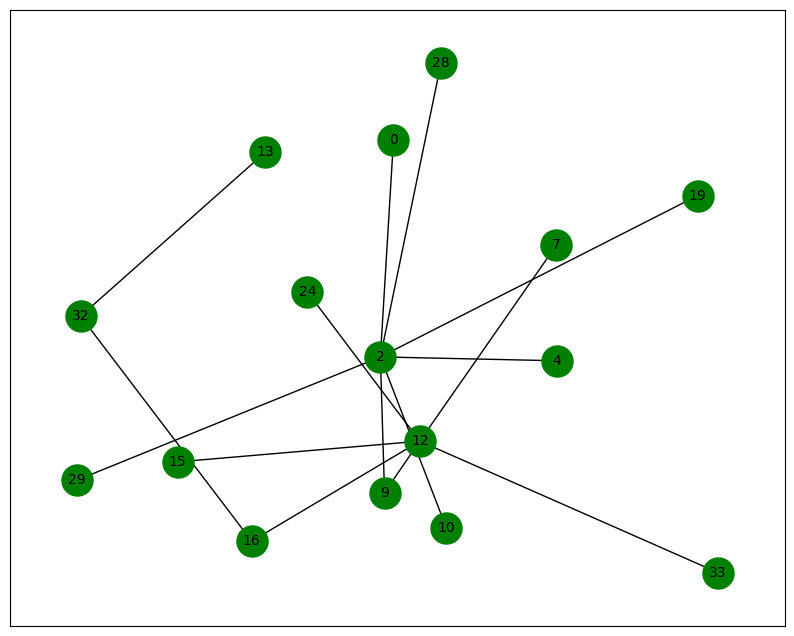

In [10]:
def induced_edge_sampling(graph, sample_size):
    """
    Perform induced edge sampling on a graph.
    
    Parameters:
    - graph: NetworkX graph object
    - sample_size: Desired number of edges to sample
    
    Returns:
    - sampled_edges: List of tuples representing sampled edges
    """
    sampled_edges = []
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    
    for node in nodes:
        neighbors = list(graph.neighbors(node))
        random.shuffle(neighbors)
        
        for neighbor in neighbors:
            if len(sampled_edges) < sample_size:
                sampled_edges.append((node, neighbor))
            else:
                return sampled_edges
    
    return sampled_edges

sample_size = 15
eds = induced_edge_sampling(G, sample_size)


sampled_G_bfs = nx.Graph()
for e in eds:
    sampled_G_bfs.add_edge(e[0], e[1])

plt.figure(figsize=(10, 8))
nx.draw_networkx(sampled_G_bfs, pos,  node_color='green', with_labels=True, node_size=500, font_size=10)

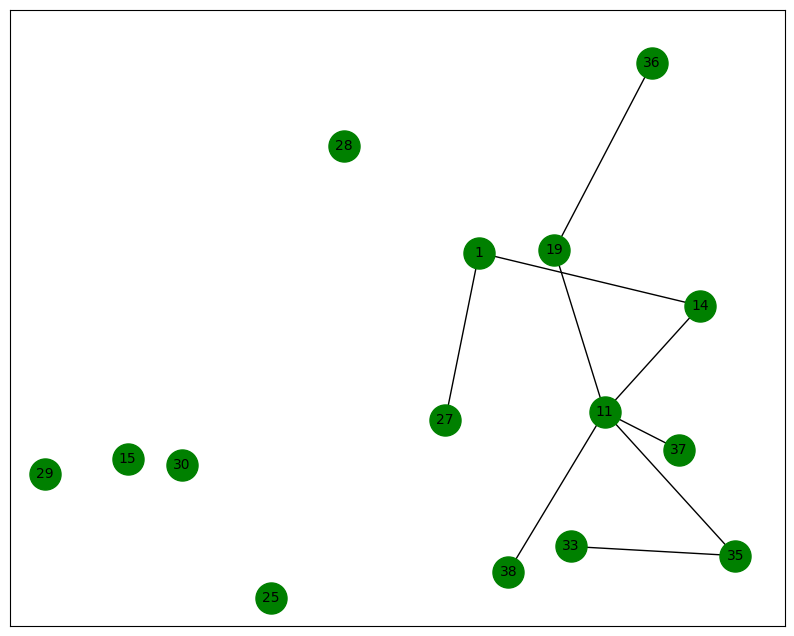

In [11]:
def random_node_sampling(graph, sample_size):
    """
    Perform random node sampling on a graph.
    
    Parameters:
    - graph: NetworkX graph object
    - sample_size: Desired number of nodes to sample
    
    Returns:
    - sampled_nodes: List of nodes sampled
    """
    sampled_nodes = random.sample(list(graph.nodes()), sample_size)
    return sampled_nodes

sample_size = 15
sampled_G_bfs = random_node_sampling(G, sample_size)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)

# Plot the original graph and the sampled graph
plt.figure(figsize=(10, 8))


nx.draw_networkx(sampled_G_bfs, pos,  node_color='green', with_labels=True, node_size=500, font_size=10)

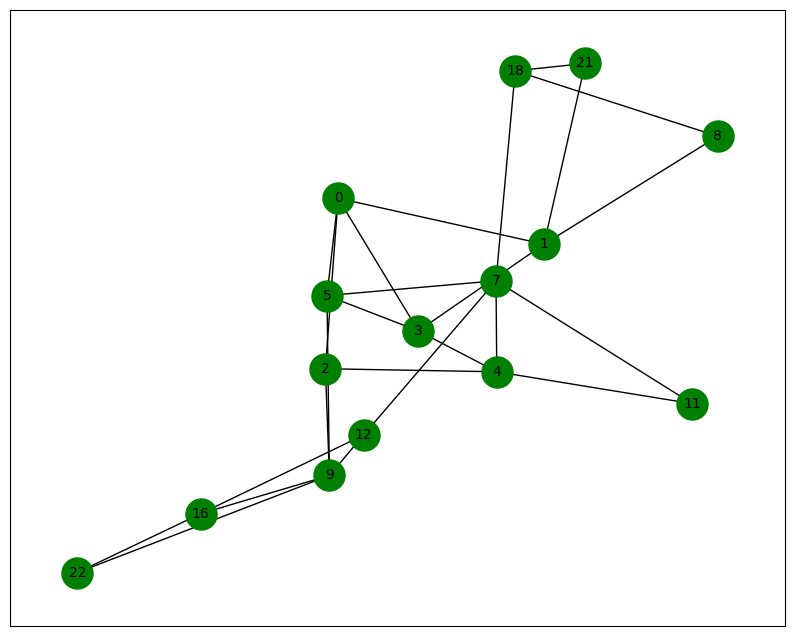

In [12]:
def degree_based_node_sampling(graph, sample_size):
    """
    Perform degree-based node sampling on a graph.
    
    Parameters:
    - graph: NetworkX graph object
    - sample_size: Desired number of nodes to sample
    
    Returns:
    - sampled_nodes: List of nodes sampled
    """
    # Create a list of nodes sorted by their degree in descending order
    nodes_sorted_by_degree = sorted(graph.nodes(), key=lambda x: graph.degree(x), reverse=True)
    
    # Sample nodes based on their degree
    sampled_nodes = nodes_sorted_by_degree[:sample_size]
    
    return sampled_nodes

sample_size = 15
sampled_G_bfs = degree_based_node_sampling(G, sample_size)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)

# Plot the original graph and the sampled graph
plt.figure(figsize=(10, 8))


nx.draw_networkx(sampled_G_bfs, pos,  node_color='green', with_labels=True, node_size=500, font_size=10)

In [13]:
def plot_degree_vs_clustering(graph):
    """
    Plot a scatter plot of node degree vs local clustering coefficient for a NetworkX graph.
    
    Parameters:
    - graph: NetworkX graph object
    """
    degrees = dict(graph.degree())
    clustering = nx.clustering(graph)
    
    x = [degrees[node] for node in graph.nodes()]
    y = [clustering[node] for node in graph.nodes()]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, marker='o', color='b', alpha=0.5)
    plt.title("Node Degree vs Local Clustering Coefficient")
    plt.xlabel("Node Degree")
    plt.ylabel("Local Clustering Coefficient")
    #plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.show()

def plot_shortest_path_length_distribution(graph):
    """
    Plot the distribution of shortest path lengths within the giant component of a NetworkX graph.
    
    Parameters:
    - graph: NetworkX graph object
    """
    # Get the largest connected component (giant component)
    largest_cc = max(nx.connected_components(graph), key=len)
    giant_component = graph.subgraph(largest_cc).copy()
    
    # Calculate shortest path lengths
    path_lengths = dict(nx.shortest_path_length(giant_component))
  
    
    # Flatten the dictionary of dictionaries into a list of path lengths
    all_lengths = []
    for source, paths in path_lengths.items():
        all_lengths.extend(paths.values())
    
    # Plot histogram of shortest path lengths
    plt.figure(figsize=(10, 6))
    plt.hist(all_lengths, bins=30, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Shortest Path Lengths in Giant Component')
    plt.xlabel('Shortest Path Length')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Bias

In [14]:
G = nx.barabasi_albert_graph(5000, 3) 

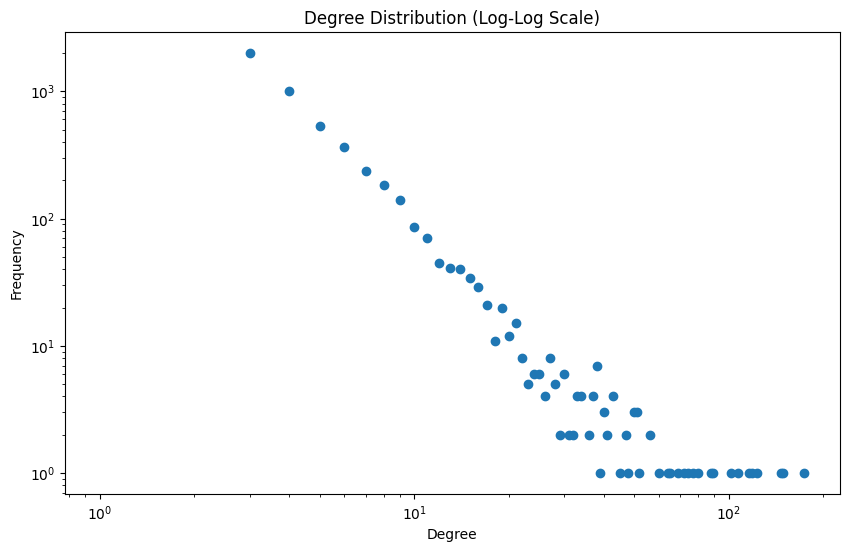

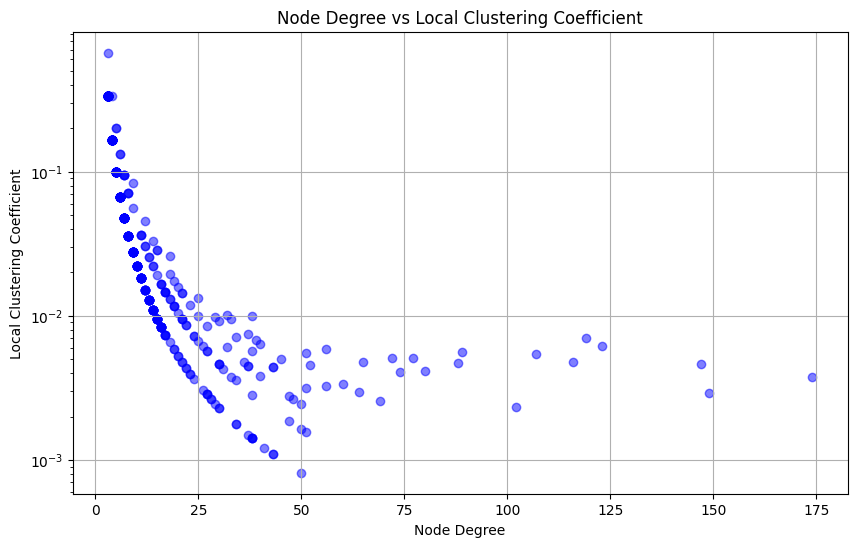

In [15]:
plot_degree_distribution(G)
plot_degree_vs_clustering(G)
#plot_shortest_path_length_distribution(G)

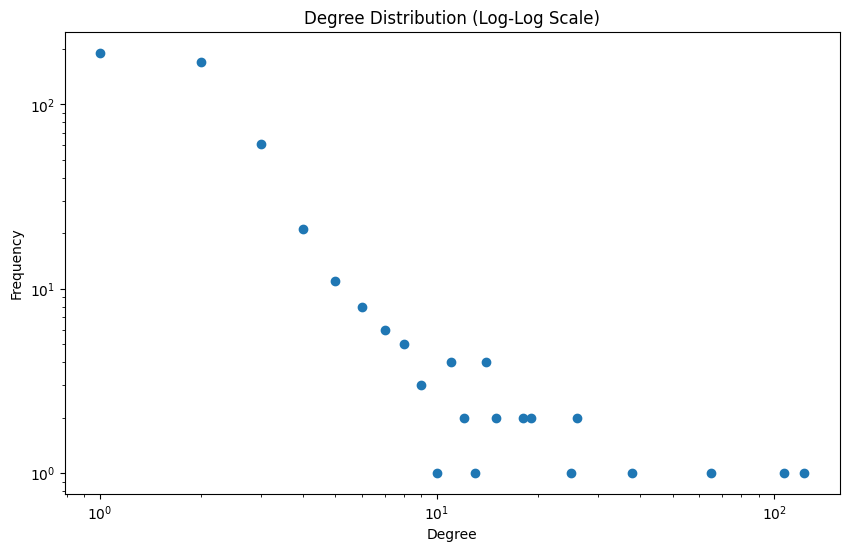

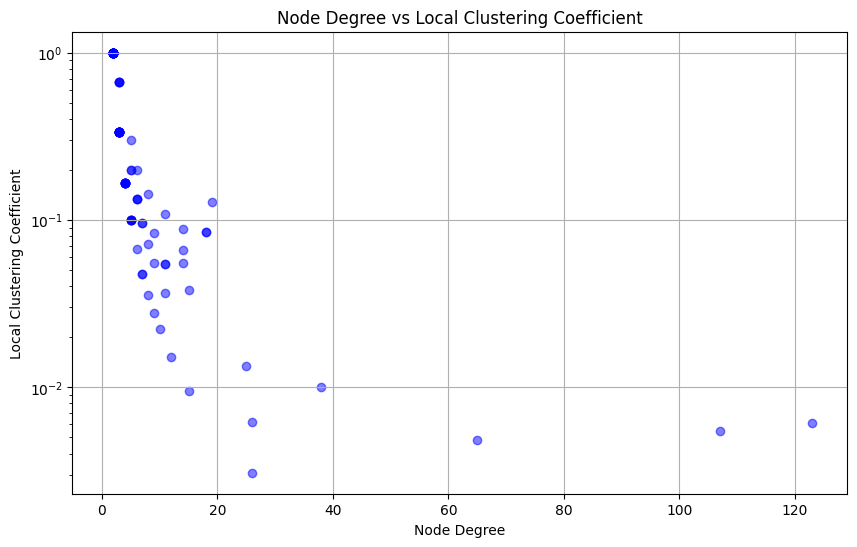

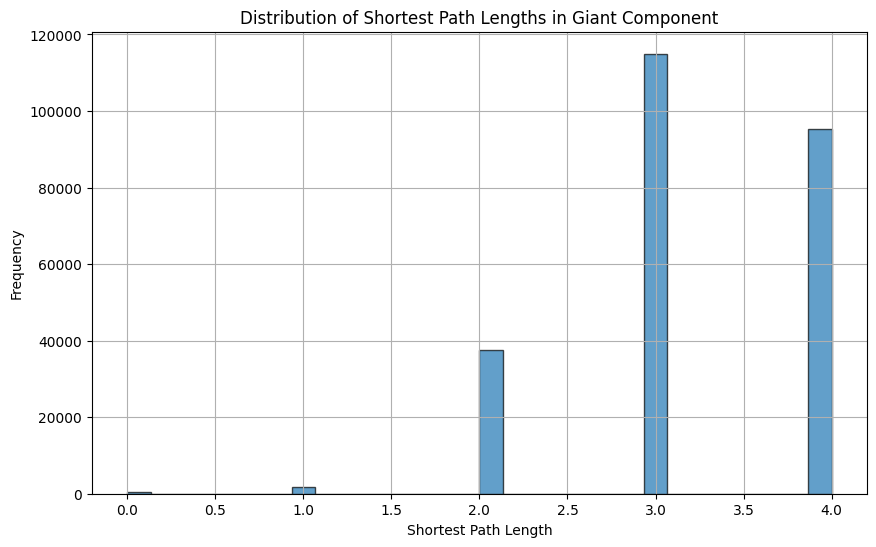

In [16]:
start_node = [0]
num_samples = 500
sampled_G_bfs = breadth_first_sampling(G, start_node, num_samples)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)
plot_degree_distribution(sampled_G_bfs)
plot_degree_vs_clustering(sampled_G_bfs)
plot_shortest_path_length_distribution(sampled_G_bfs)

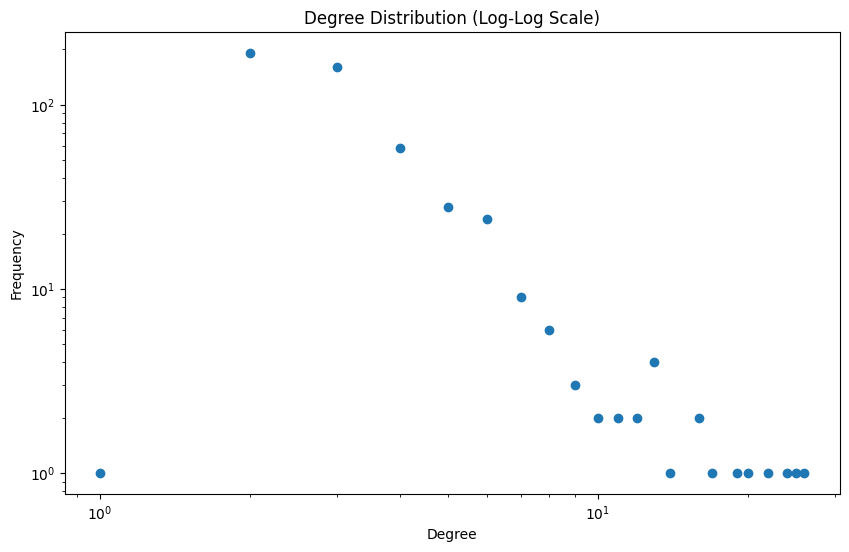

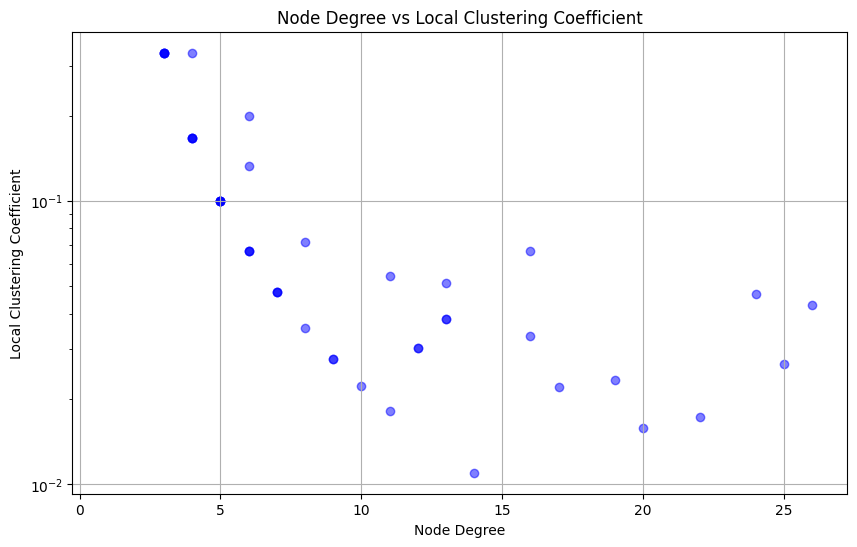

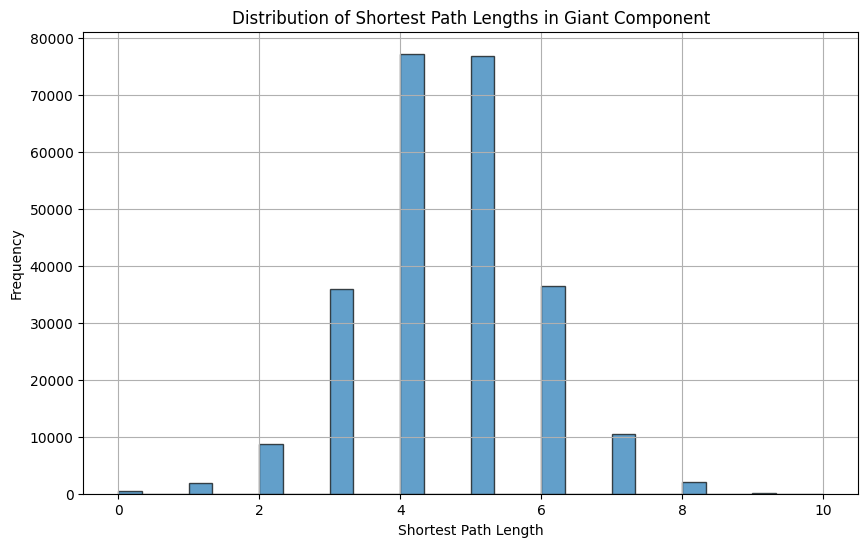

In [17]:
start_node = 0
num_samples = 500
sampled_G_bfs = depth_first_sampling(G, start_node, num_samples)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)
plot_degree_distribution(sampled_G_bfs)
plot_degree_vs_clustering(sampled_G_bfs)
plot_shortest_path_length_distribution(sampled_G_bfs)

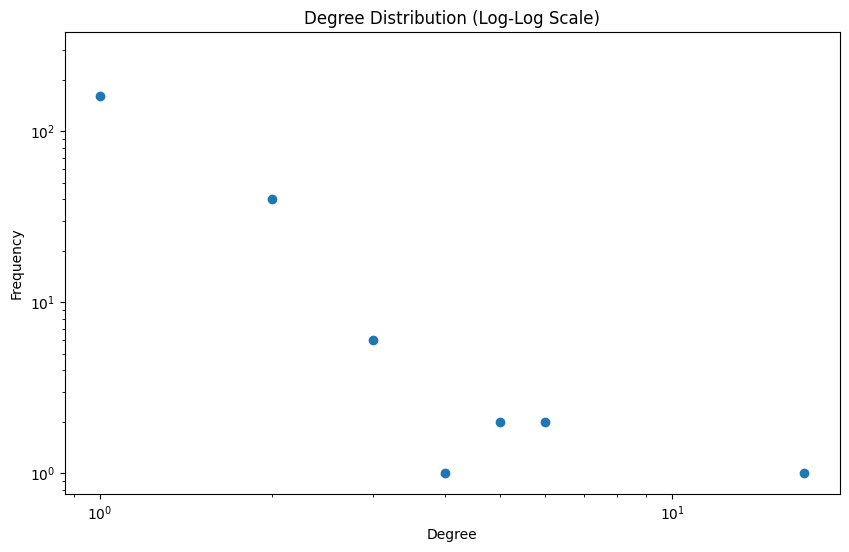

/var/folders/_8/21qml4c57p7cmb39vj5bvg3h0000gn/T/ipykernel_31632/3336110081.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


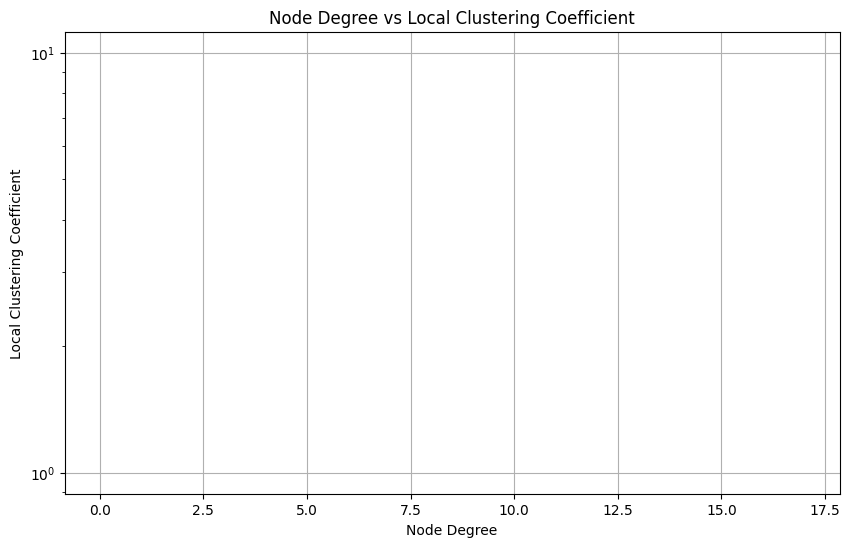

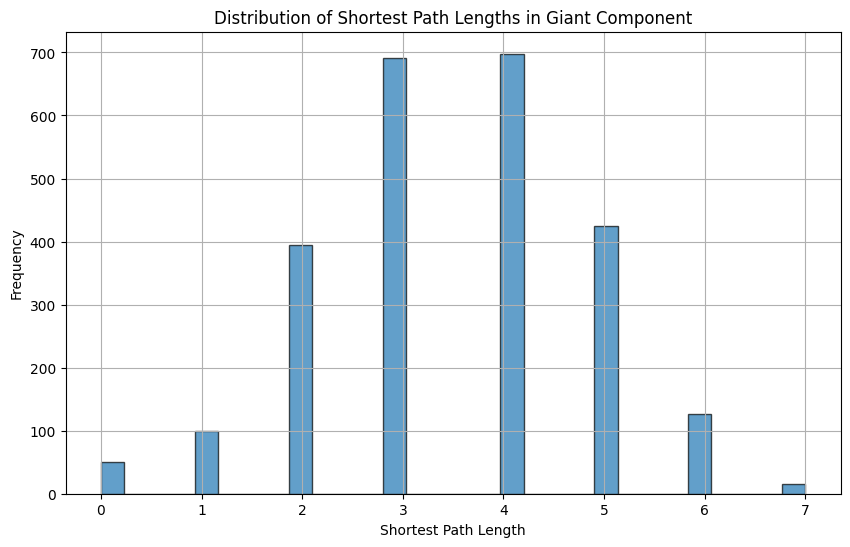

In [18]:
start_node = 0
num_samples = 500
sampled_G_bfs = random_node_sampling(G, num_samples)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)
plot_degree_distribution(sampled_G_bfs)
plot_degree_vs_clustering(sampled_G_bfs)
plot_shortest_path_length_distribution(sampled_G_bfs)

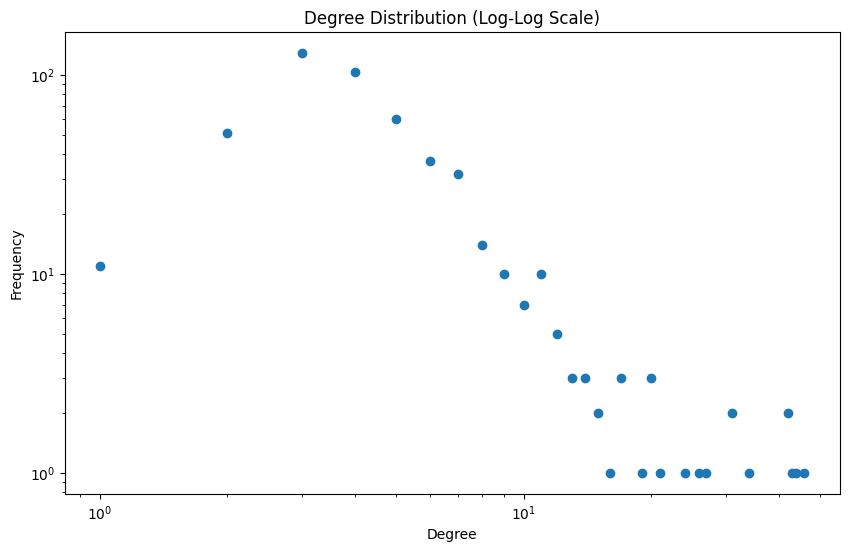

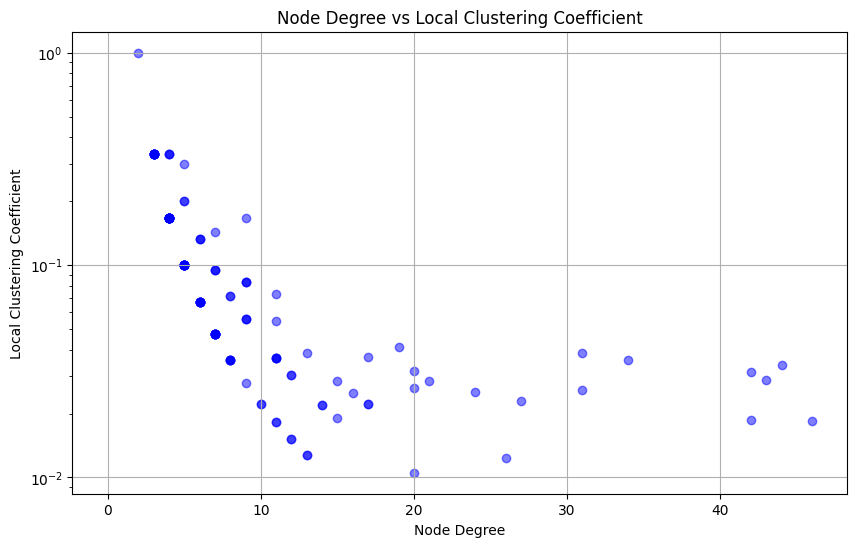

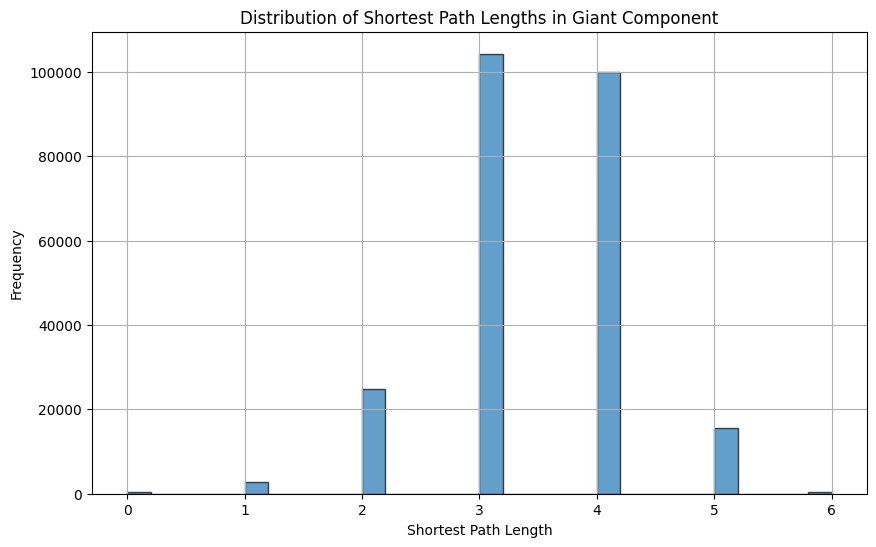

In [19]:
start_node = 0
num_samples = 500
sampled_G_bfs = degree_based_node_sampling(G, num_samples)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)
plot_degree_distribution(sampled_G_bfs)
plot_degree_vs_clustering(sampled_G_bfs)
plot_shortest_path_length_distribution(sampled_G_bfs)

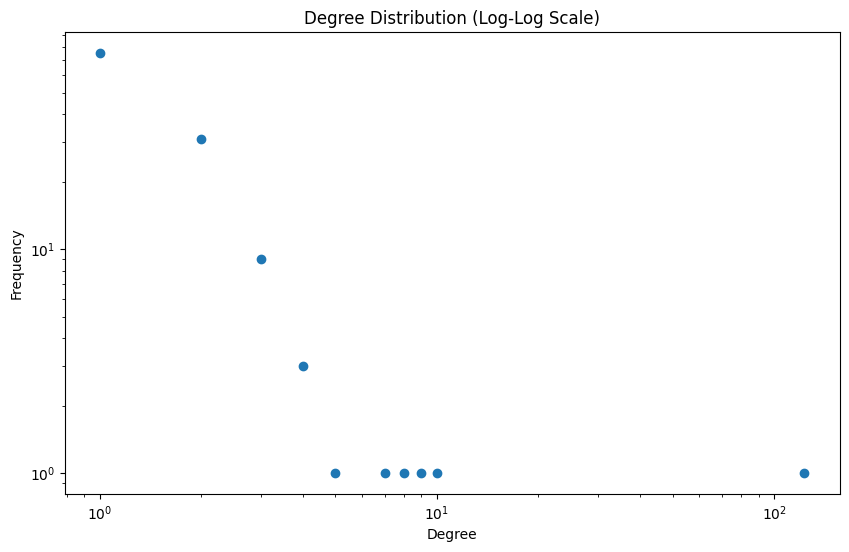

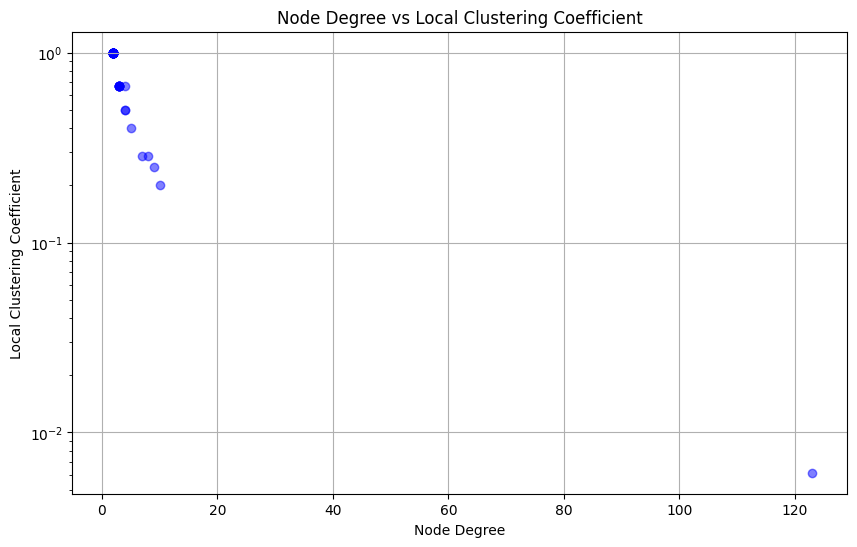

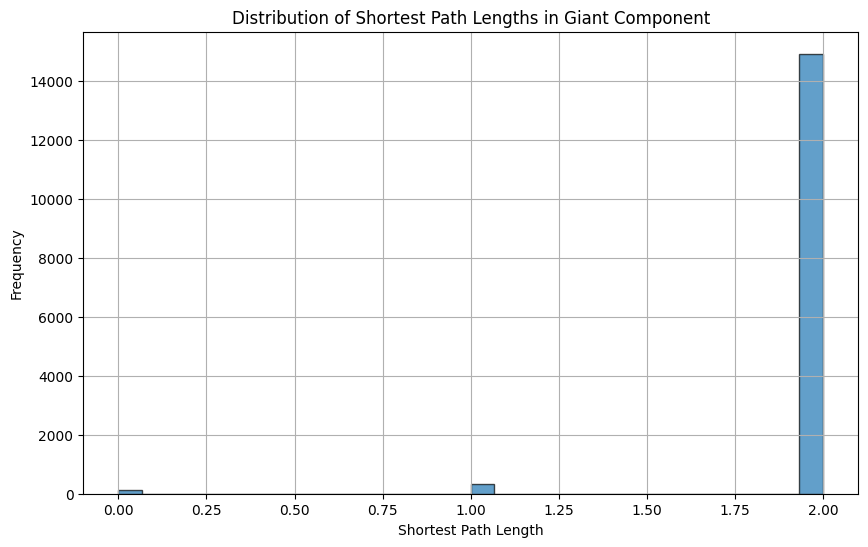

In [20]:
initial_nodes = [0]
num_samples = 500
sampled_G_bfs = snowball_sampling(G, initial_nodes, sample_size=num_samples) 
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)
plot_degree_distribution(sampled_G_bfs)
plot_degree_vs_clustering(sampled_G_bfs)
plot_shortest_path_length_distribution(sampled_G_bfs)

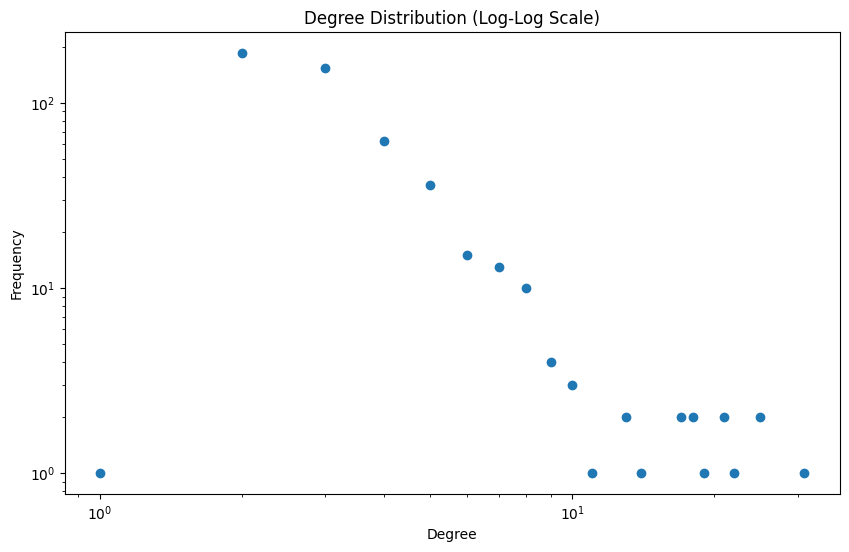

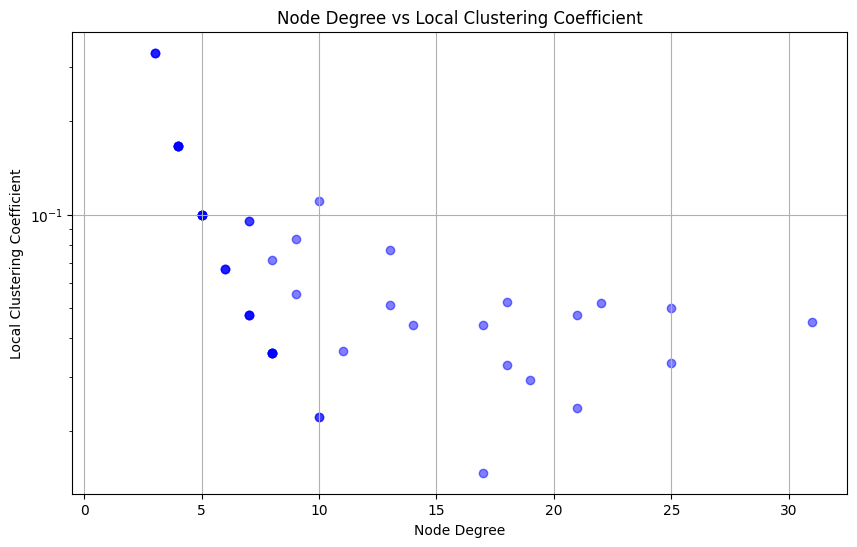

In [21]:
start_node = 0
num_samples = 500
sampled_G_bfs = depth_first_sampling(G, start_node, num_samples)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)
plot_degree_distribution(sampled_G_bfs)
plot_degree_vs_clustering(sampled_G_bfs)


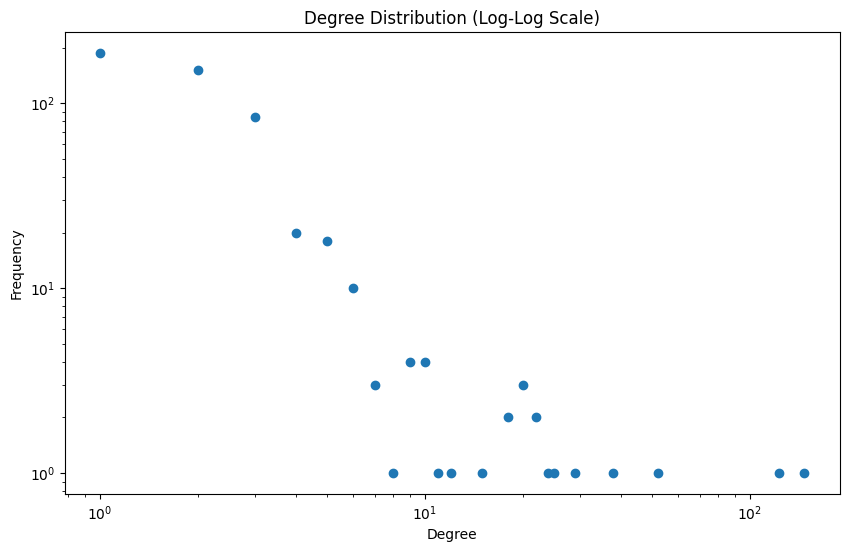

In [22]:
start_node = [0]
num_samples = 500
sampled_G_bfs = breadth_first_sampling(G, start_node, num_samples)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)
plot_degree_distribution(sampled_G_bfs)

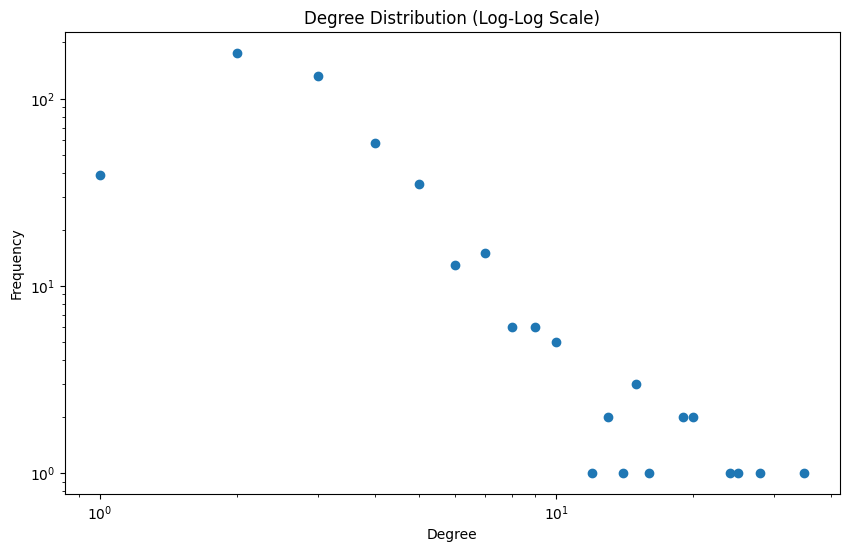

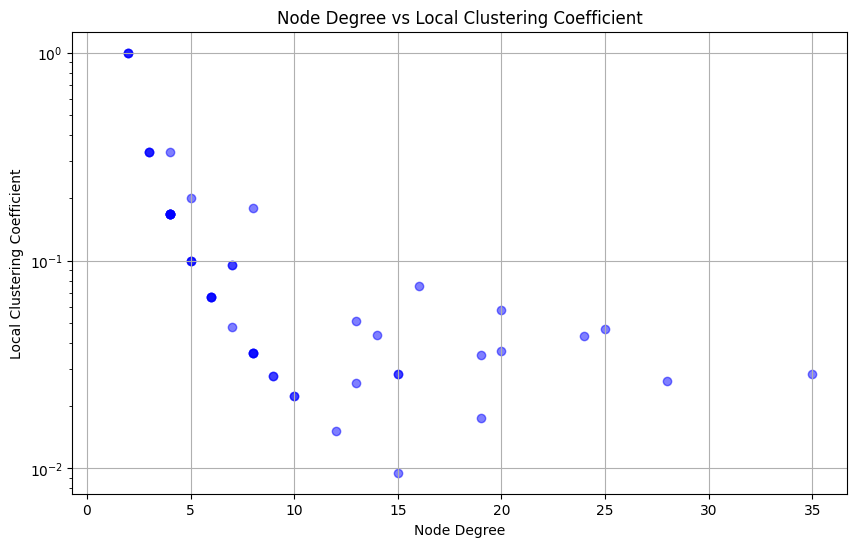

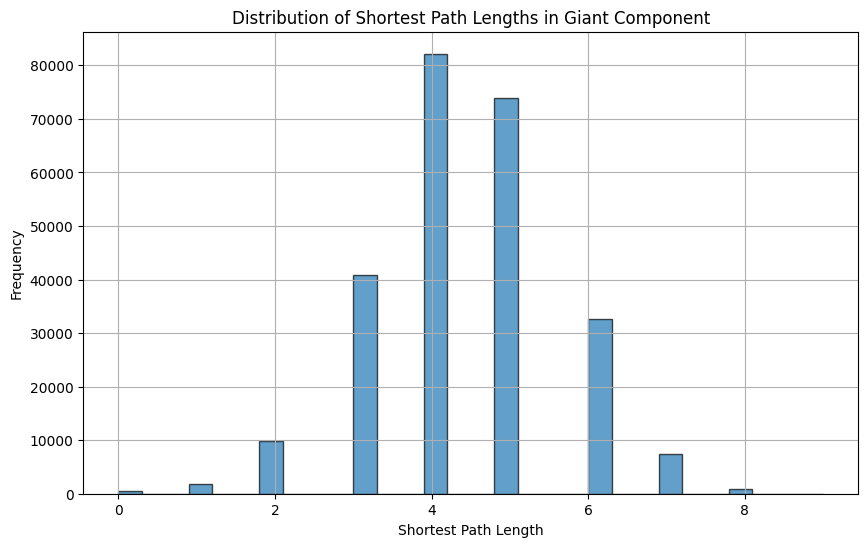

In [23]:
start_node = 0
num_samples = 500
sampled_G_bfs = random_walk_sampling(G, start_node, num_samples)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)
plot_degree_distribution(sampled_G_bfs)
plot_degree_vs_clustering(sampled_G_bfs)
plot_shortest_path_length_distribution(sampled_G_bfs)

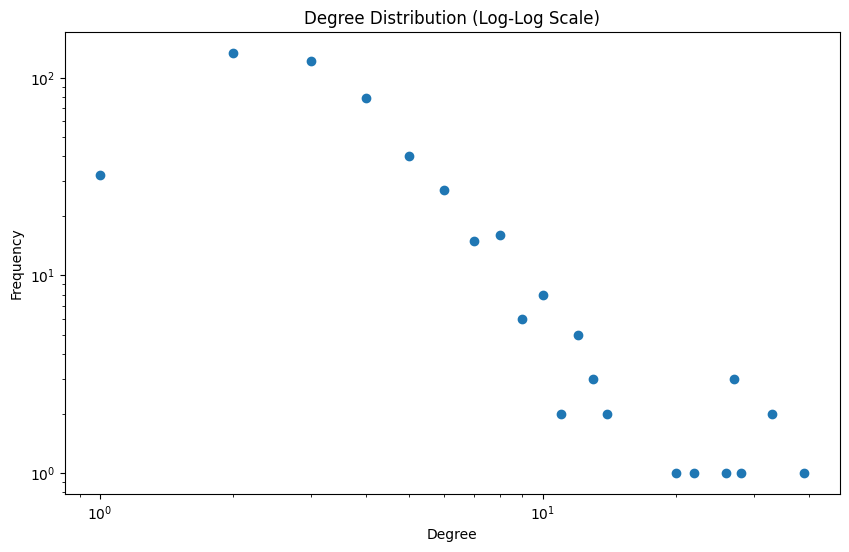

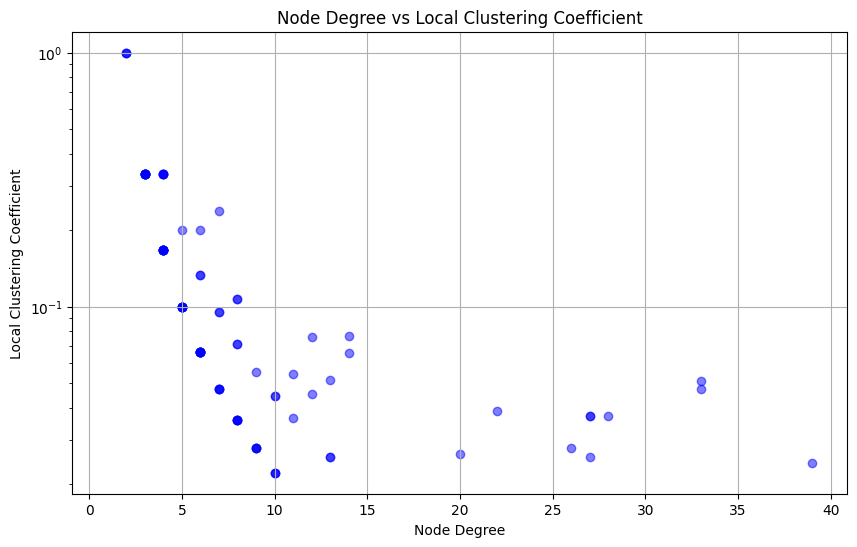

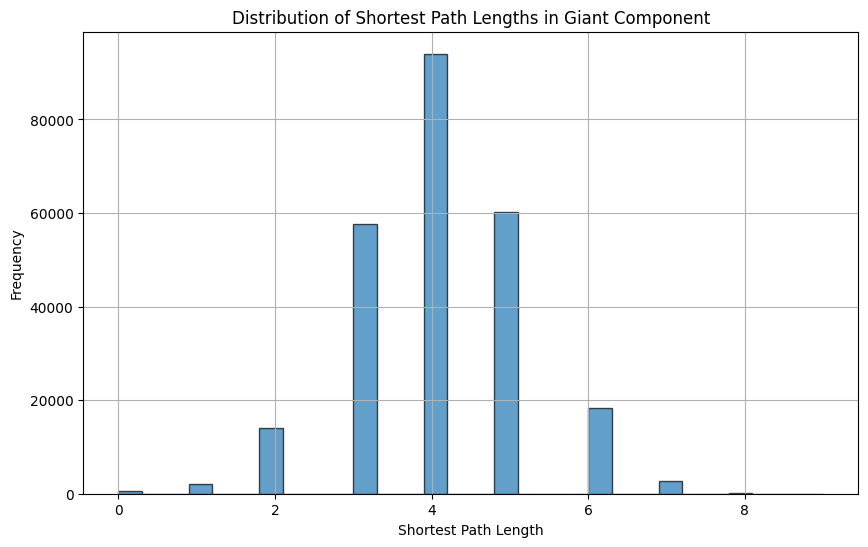

In [24]:
start_node = 0
num_samples = 500
sampled_G_bfs = metropolis_hastings_sampling(G, start_node, num_samples)
sampled_G_bfs = nx.subgraph(G, sampled_G_bfs)
plot_degree_distribution(sampled_G_bfs)
plot_degree_vs_clustering(sampled_G_bfs)
plot_shortest_path_length_distribution(sampled_G_bfs)

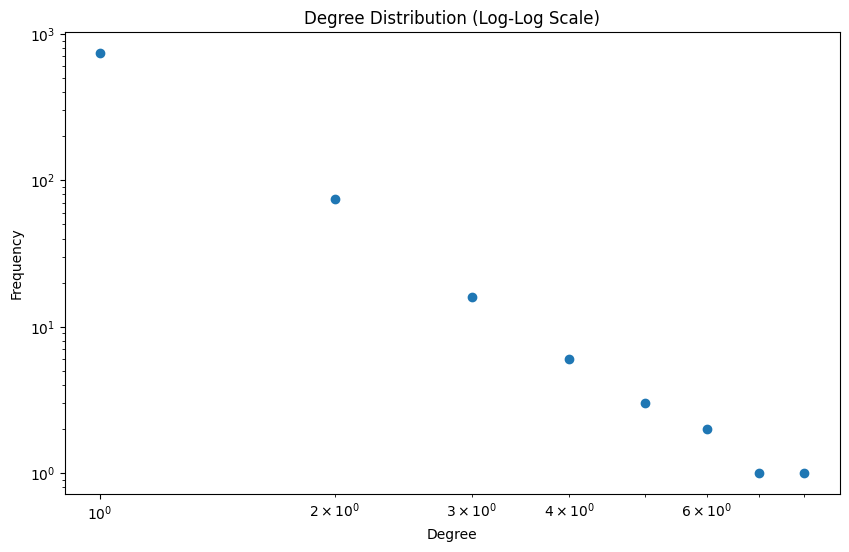

/var/folders/_8/21qml4c57p7cmb39vj5bvg3h0000gn/T/ipykernel_31632/3336110081.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


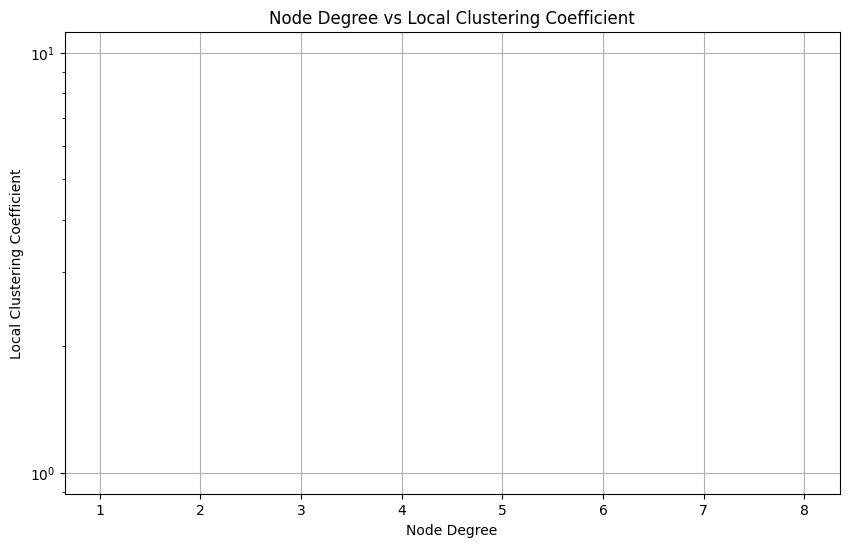

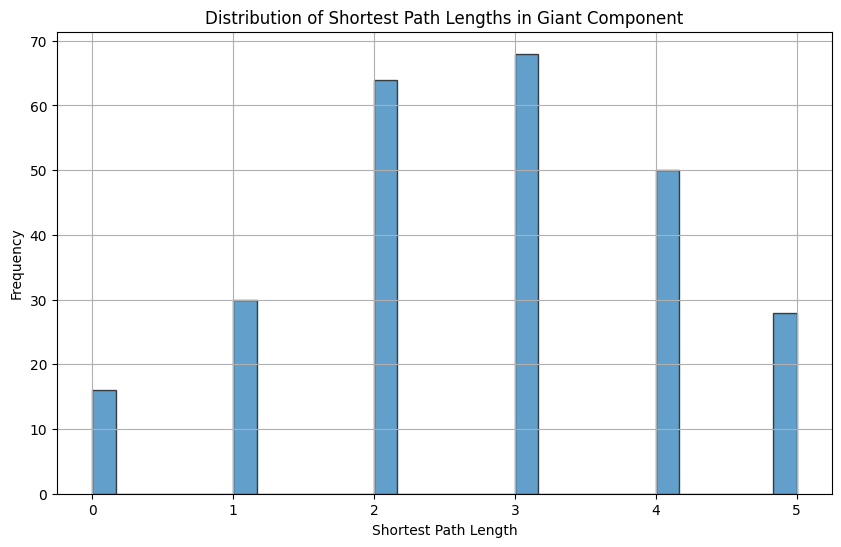

In [25]:
start_node = 0
num_samples = 500
eds = random_edge_sampling(G, num_samples)

sampled_G_bfs = nx.Graph()
for e in eds:
    sampled_G_bfs.add_edge(e[0], e[1])

plot_degree_distribution(sampled_G_bfs)
plot_degree_vs_clustering(sampled_G_bfs)
plot_shortest_path_length_distribution(sampled_G_bfs)

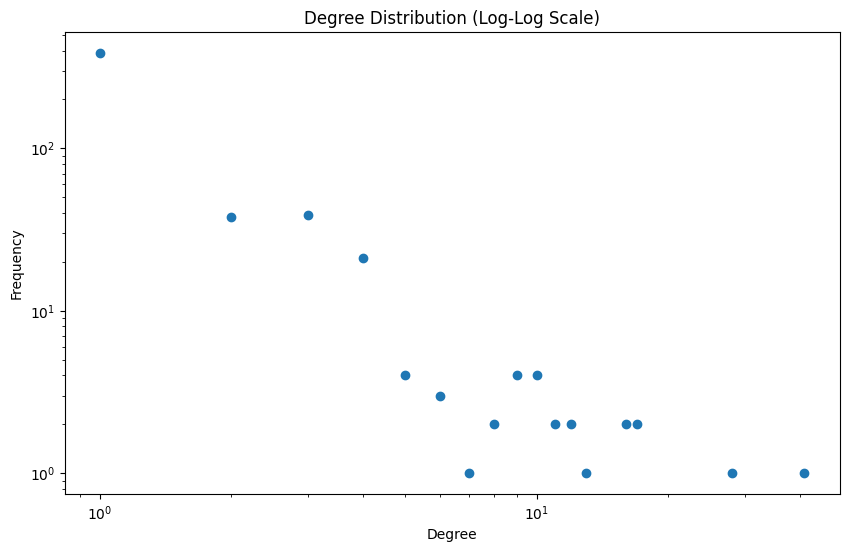

/var/folders/_8/21qml4c57p7cmb39vj5bvg3h0000gn/T/ipykernel_31632/3336110081.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


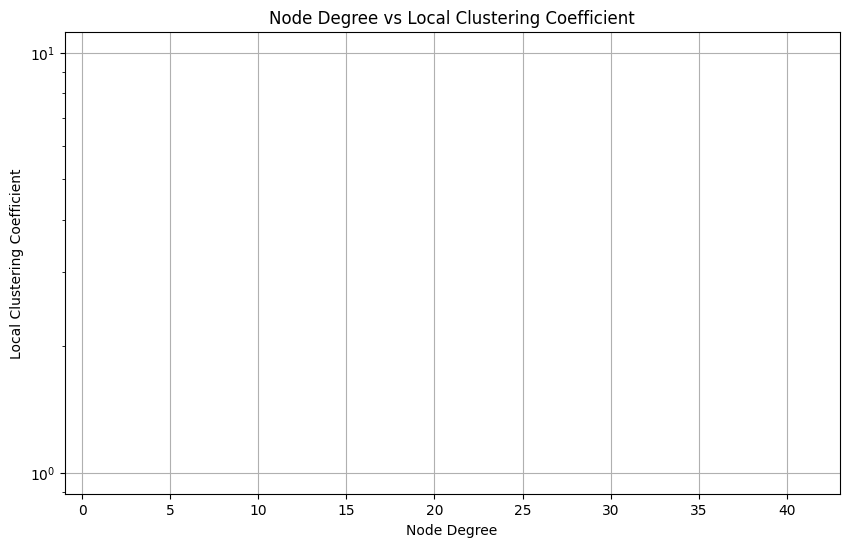

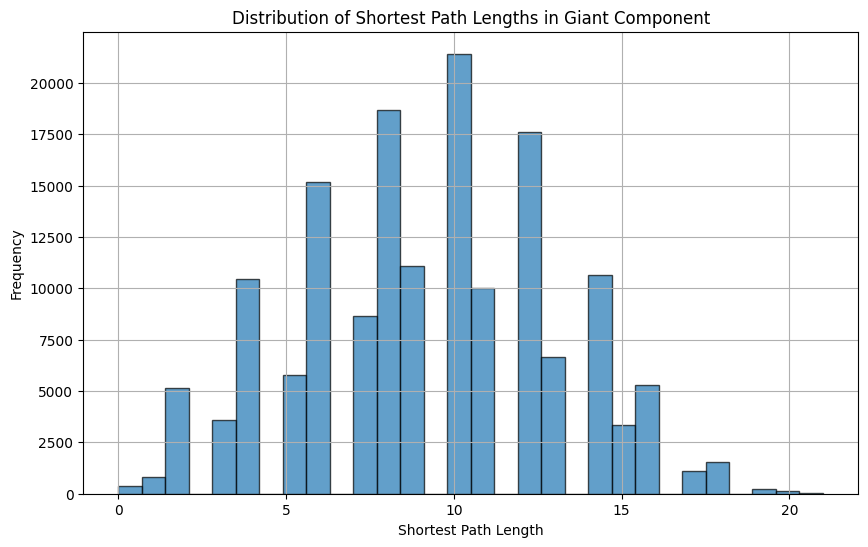

In [26]:
start_node = 0
num_samples = 500
eds = induced_edge_sampling(G, num_samples)

sampled_G_bfs = nx.Graph()
for e in eds:
    sampled_G_bfs.add_edge(e[0], e[1])

plot_degree_distribution(sampled_G_bfs)
plot_degree_vs_clustering(sampled_G_bfs)
plot_shortest_path_length_distribution(sampled_G_bfs)